In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
# factores multiplicativos de unidades métricas
m = 1.
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

In [3]:
#Función para graficar
def graph(entrada, mode):
    if mode == "i":
        plt.figure()
        plt.imshow(np.abs(entrada)**2)
        plt.show()
    elif mode == "f":
        plt.figure()
        plt.imshow(np.angle(entrada))
        plt.show()
    elif mode == "real":
        plt.figure()
        plt.imshow(np.real(entrada))
        plt.show()
    elif mode == "imag":
        plt.figure()
        plt.imshow(np.imag(entrada))
        plt.show()

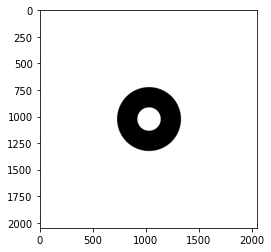

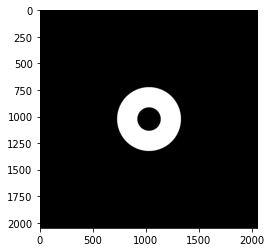

In [4]:
#fig, ax = plt.subplots(1, 2, figsize=(15, 15))

# Dona
N = 2048
w_o = 300
w_i = 110
donut = np.ones((N,N),dtype="uint8")

cv2.circle(donut,(int(N/2),int(N/2)),w_o,0,-1)
cv2.circle(donut,(int(N/2),int(N/2)),w_i,1,-1)
#ax[0].set_title("Dona")
#ax[0].imshow(donut,cmap='gray')
plt.imshow(donut, cmap='gray')
plt.show()
# Dona complemento
donut2 = np.zeros((N,N),dtype="uint8")

cv2.circle(donut2,(int(N/2),int(N/2)),w_o,1,-1)
cv2.circle(donut2,(int(N/2),int(N/2)),w_i,0,-1)
#ax[1].set_title("Dona complemento")
#ax[1].imshow(donut2,cmap='gray')
plt.imshow(donut2, cmap='gray')
plt.show()


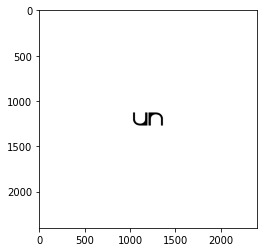

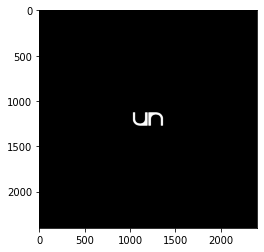

In [5]:
#Máscaras UN
un = cv2.imread('unal.png',0)
un = np.pad(un, 1000)
un[un > 25] = 1
plt.figure()
plt.imshow(un, 'Greys')
plt.show()

un2 = cv2.imread('unal.png',0)
un2 = np.pad(un2, 1000)
un2[un2 < 25] = 1
un2[un2 > 25] = 0
plt.figure()
plt.imshow(un2, 'Greys')
plt.show()

In [5]:
def ang_spec(entrada, del_x, del_y, wave_length, z):
    
    k = 2*np.pi/wave_length
    M, N = np.shape(entrada)

    dist = M*del_x**2/wave_length
    
    # Dimensiones longitudinales de la imagen
    Lx = del_x*N
    Ly = del_y*M
    # Tamaño muestral en las frecuencias
    del_fx = 1/Lx
    del_fy = 1/Ly
        
    if N%2==0:
        x = np.arange(-int(N/2),int(N/2),1)
    else:
        x = np.arange(-int(N/2),int(N/2)+1,1)

    if M%2==0:
        y = np.arange(-int(M/2),int(M/2),1)
    else:
        y = np.arange(-int(M/2),int(M/2)+1,1)
        
        
    p, q = np.meshgrid(x,y)
    fx = p*del_fx
    fy = q*del_fy
        
    # espectro angular en el plano de entrada
    A_0 = np.fft.fftshift(np.fft.fft2(entrada)) #np.fft.fft2(entrada) #
    ker = np.exp(1j*z*k*np.emath.sqrt(1 - (wave_length**2)*(fx**2+fy**2) )  )
    ker = ker
    A_z = A_0*ker
    U_z = np.fft.ifft2(A_z)

    #print(f'Longitud x de la imagen: {round(del_x*np.shape(entrada)[1]*100, 2)} cm \nLongitud y de la imagen: {round(del_y*np.shape(entrada)[0]*100, 2)} cm ')
    #print(f'Máxima distancia de propagación aceptable: {round(dist, 4)} metros o {round(dist*100, 2)} centímetros')

    return U_z

In [6]:
del_x = 5*um
del_y = 5*um
wave_length = 633*nm
z = 5*cm
dona = ang_spec(donut, del_x, del_y, wave_length, z)
dona_complemento = ang_spec(donut2, del_x, del_y, wave_length, z)

In [7]:
def dist(M,wave_length):
     dist = M*del_x**2/wave_length
     print(f'Para M = {M}, z = {dist*100}')

dist(2048, wave_length)

Para M = 2048, z = 8.088467614533963


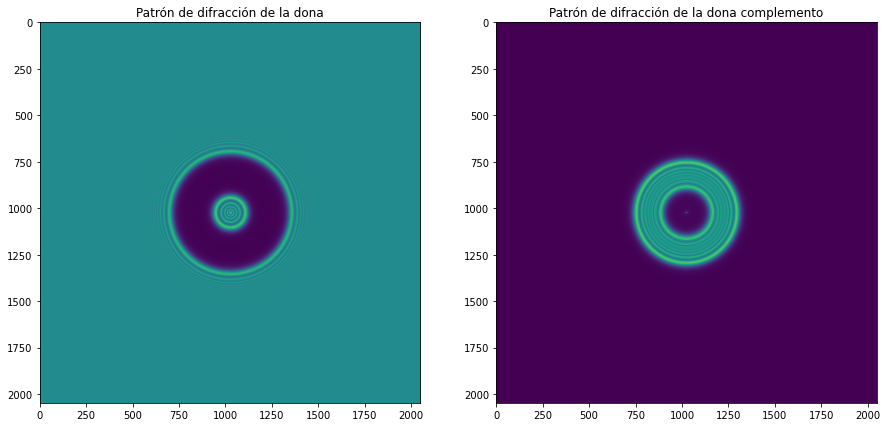

In [9]:
fig2, ax1 = plt.subplots(1, 2, figsize=(15, 15))
ax1[0].set_title("Patrón de difracción de la dona")
ax1[0].imshow(np.abs(dona)**2)

ax1[1].set_title("Patrón de difracción de la dona complemento")
ax1[1].imshow(np.abs(dona_complemento)**2)
plt.show()


In [10]:
np.max(np.angle(ang_spec(donut, del_x, del_y, wave_length, z)))

3.141454830000057

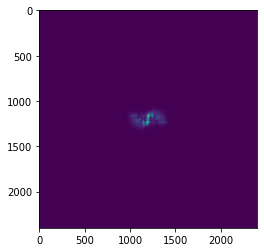

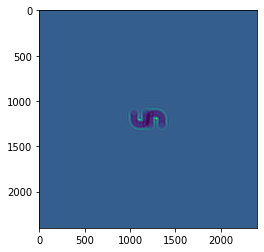

In [11]:
del_x = 5*um
del_y = 5*um
wave_length = 633*nm
z = 9*cm
mode = 'i'

graph(ang_spec(un, del_x, del_y, wave_length, z), mode)
graph(ang_spec(un2, del_x, del_y, wave_length, z), mode)

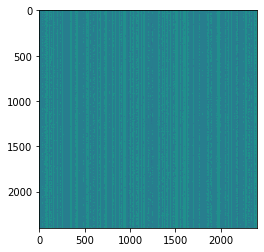

In [12]:
plt.imshow(np.abs(ang_spec(un, del_x, del_y, wave_length, z)+ang_spec(un2, del_x, del_y, wave_length, z))**2)
plt.show()

In [19]:
z = np.linspace(0, 30*cm, 1000)
y = []
x = []
for i in z:
    y.append(np.max(np.abs(ang_spec(donut, del_x, del_y, wave_length, i)+ang_spec(donut2, del_x, del_y, wave_length, i)))**2)
    x.append(np.min(np.abs(ang_spec(donut, del_x, del_y, wave_length, i)+ang_spec(donut2, del_x, del_y, wave_length, i)))**2)

In [20]:
#Vector con los valores máximos de intensidad de la suma de los campos difractados por máscaras complementarias 
a=np.array(y)

#Vector con los valores mínimos de intensidad de la suma de los campos difractados por máscaras complementarias
b=np.array(x)

Text(0.5, 0, 'z [m]')

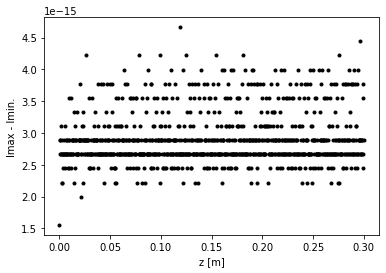

In [36]:
plt.plot(z, a-b, 'k.')
plt.ylabel("Imax - Imin.")
plt.xlabel("z [m]")
#plt.title("Rango de las diferencias de intensidad \n aplicando el principio de Babinet", 
#          fontdict={'family': 'serif', 
#                    'color' : 'darkblue',
#                    'size': 18})

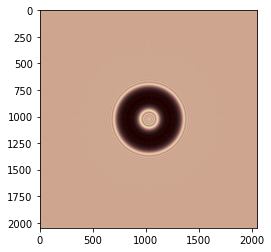

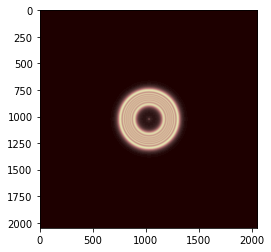

In [61]:
%matplotlib inline
plt.imshow(np.abs(dona)**2 ,cmap='pink')
plt.show()

plt.imshow(np.abs(dona_complemento)**2,cmap='pink')
plt.show()

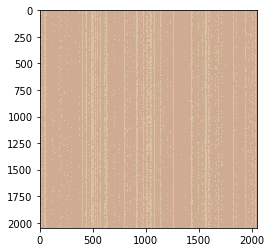

In [8]:
plt.imshow(np.abs(dona+dona_complemento)**2,cmap='pink')
plt.show()

In [9]:
np.max(np.abs(dona+dona_complemento)**2)

1.0000000000000013

In [10]:
np.min(np.abs(dona+dona_complemento)**2)

0.9999999999999987